# I. Importation des bibliothèques

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# II. Chargement du fichier silver.csv

In [105]:
data_path = '../data/silver.csv'
df = pd.read_csv(data_path)

# III. Analyse univariée

In [106]:
pd.set_option('display.max_columns', None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,False,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,False,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,False,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,True,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## A. Visualisation des distributions

<Figure size 1000x500 with 0 Axes>

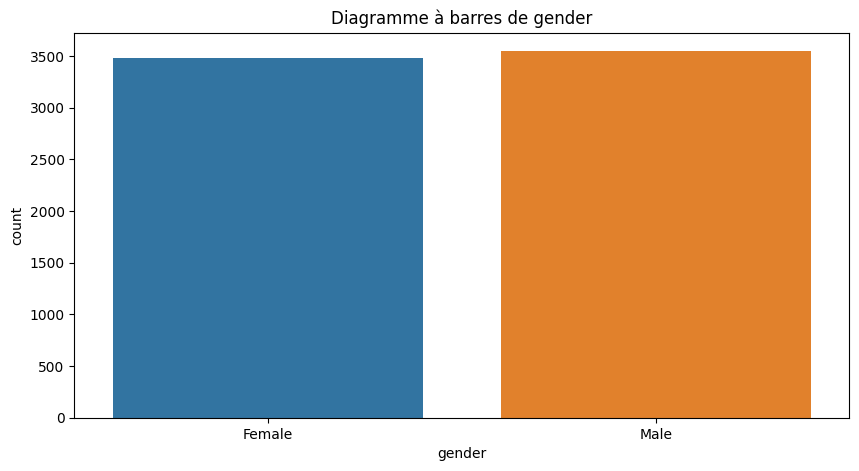

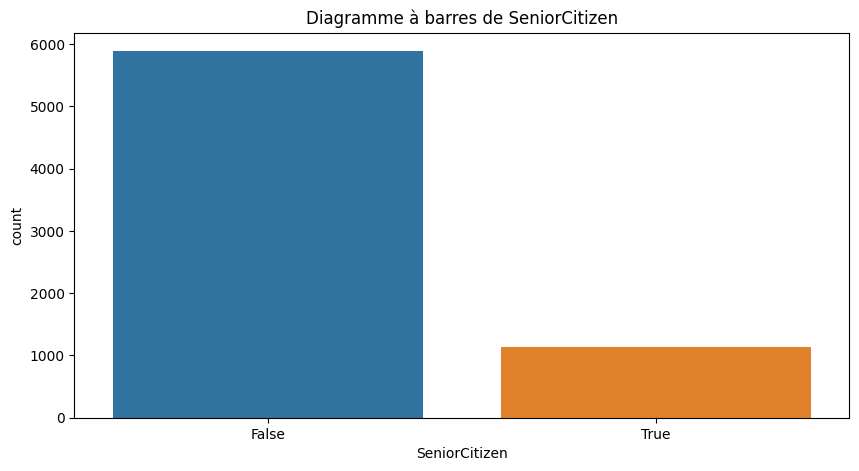

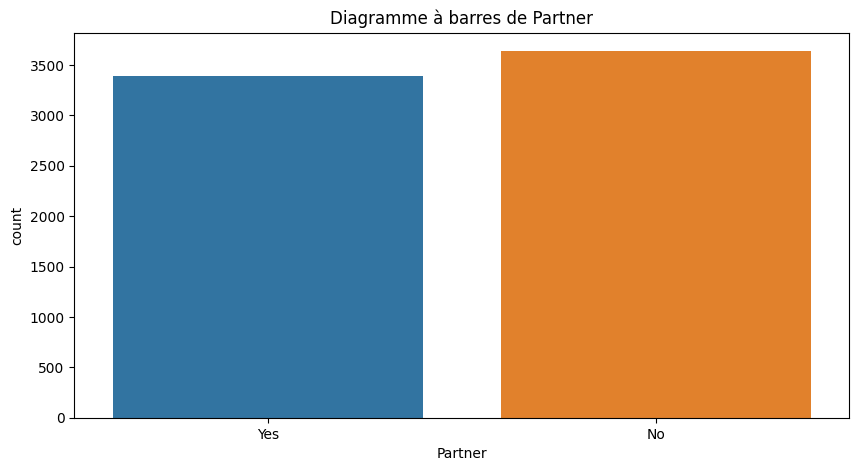

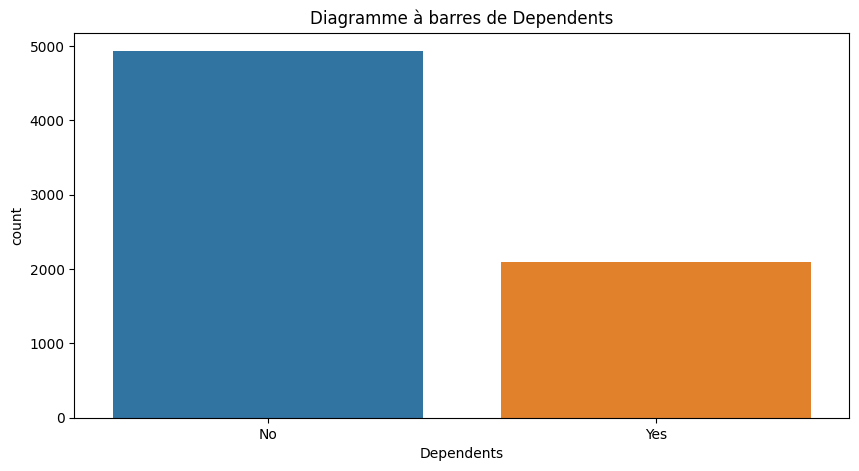

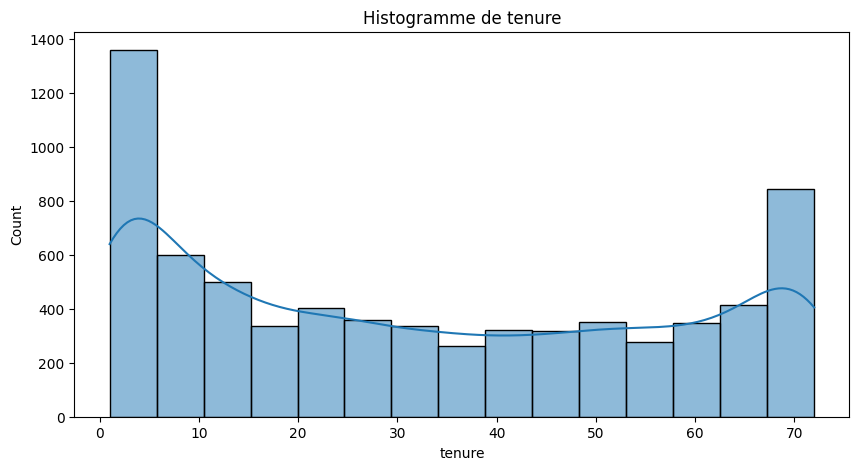

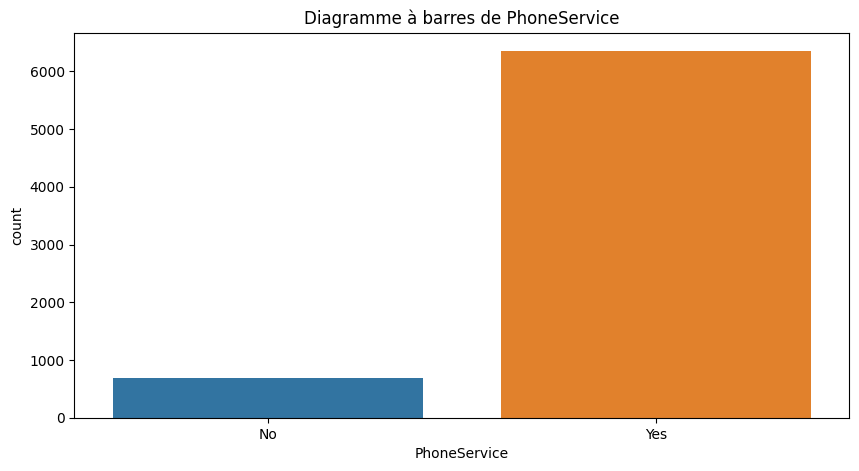

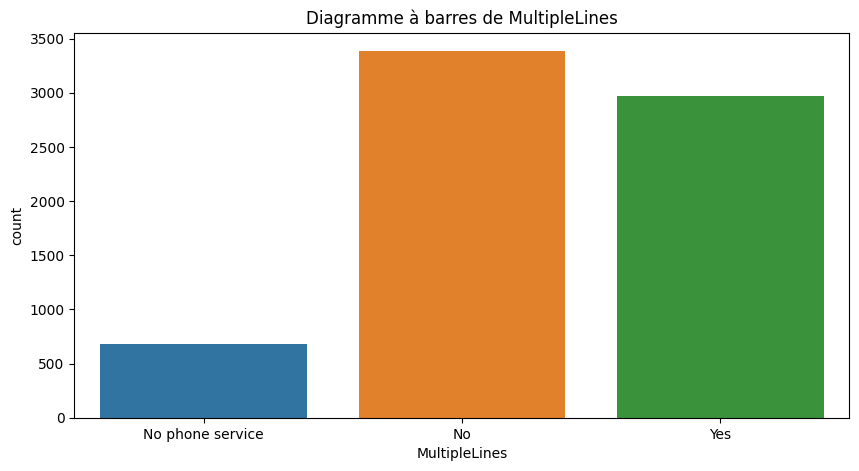

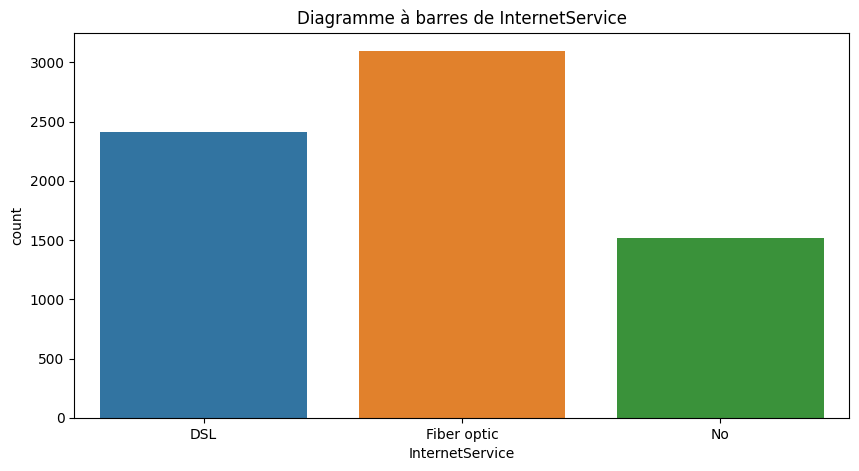

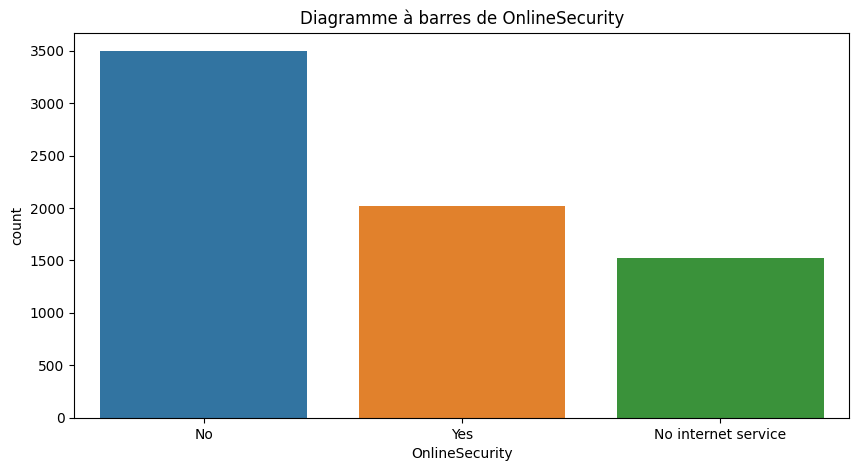

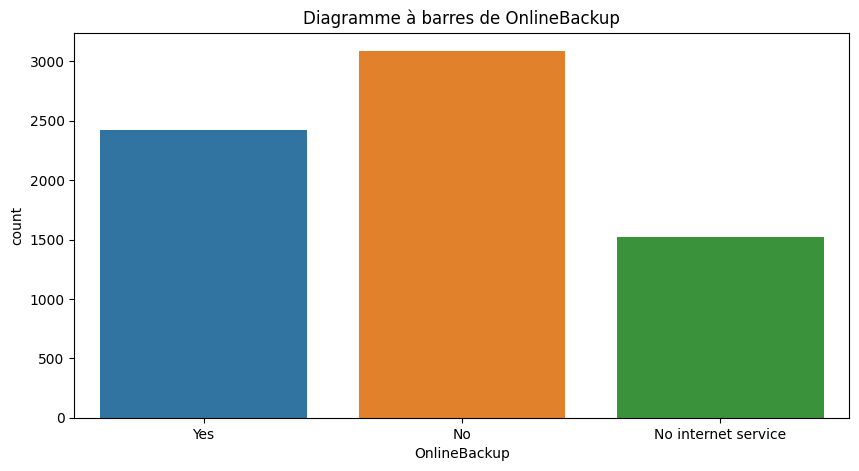

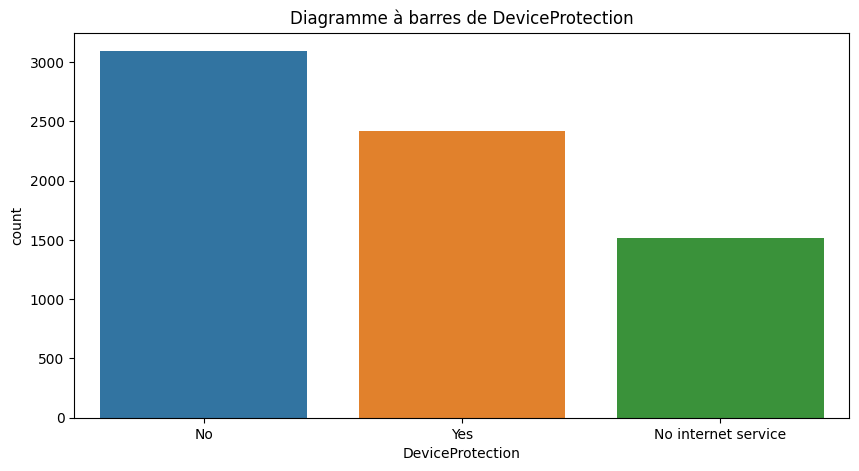

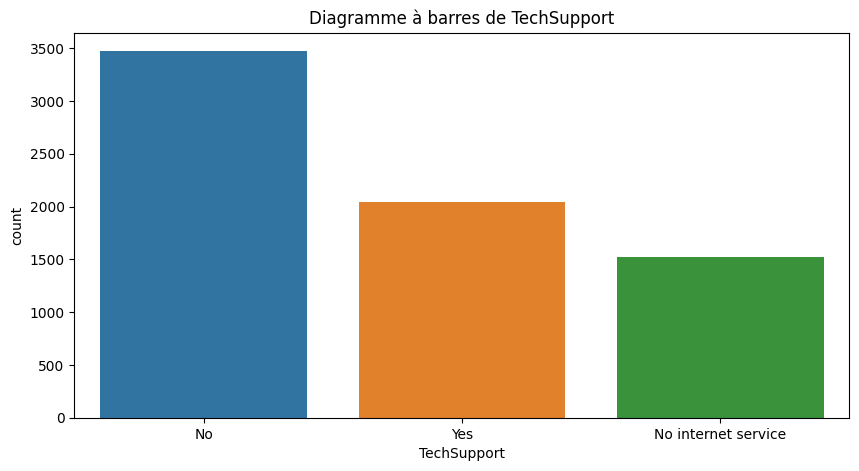

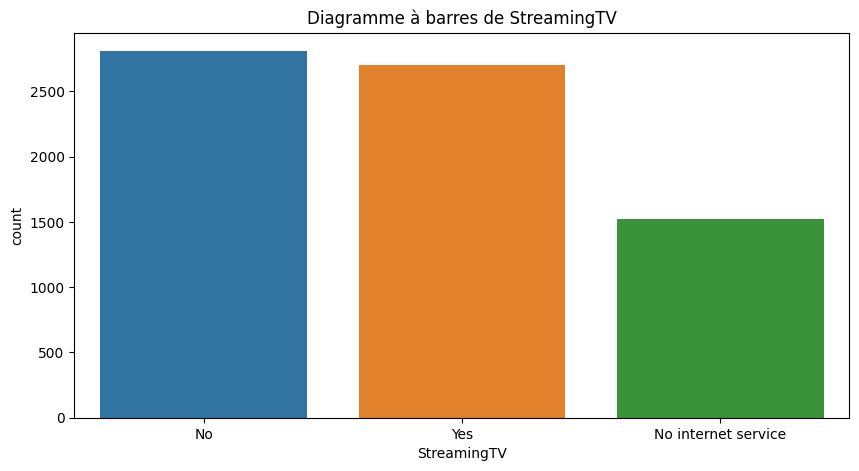

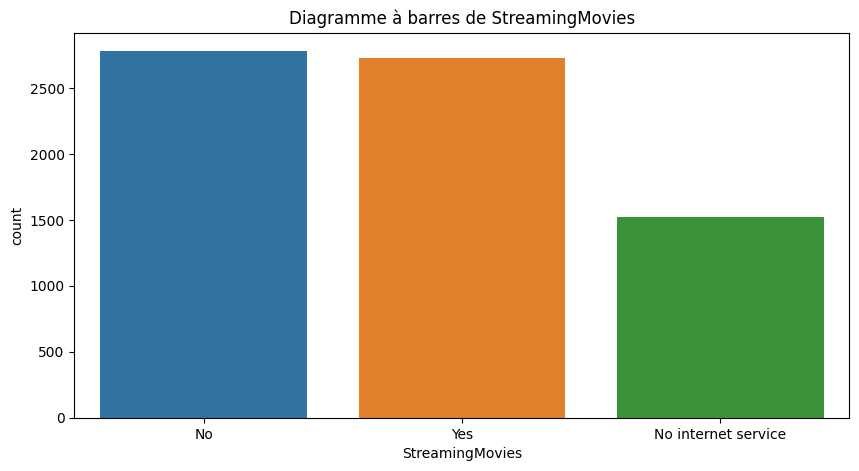

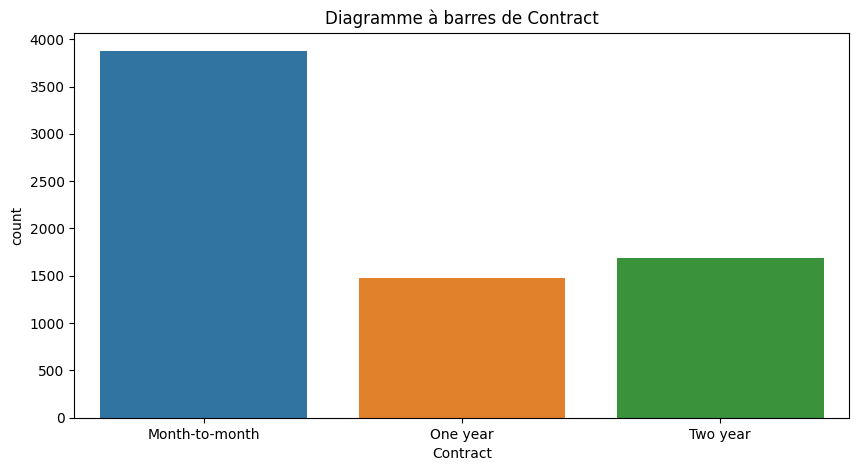

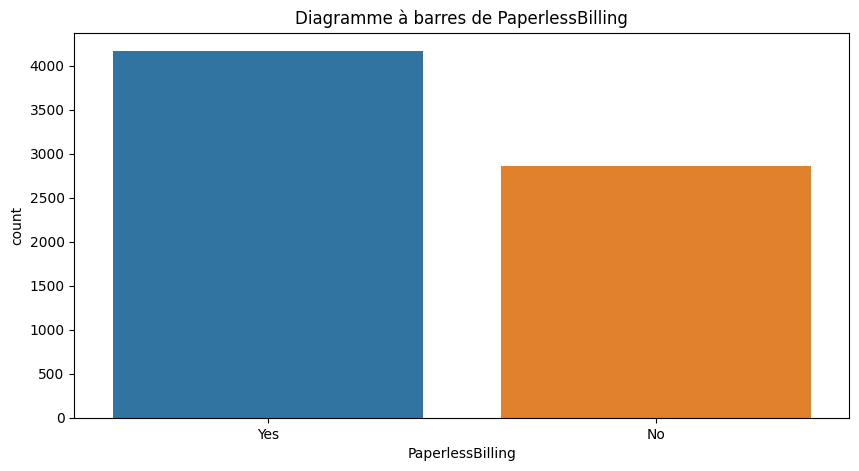

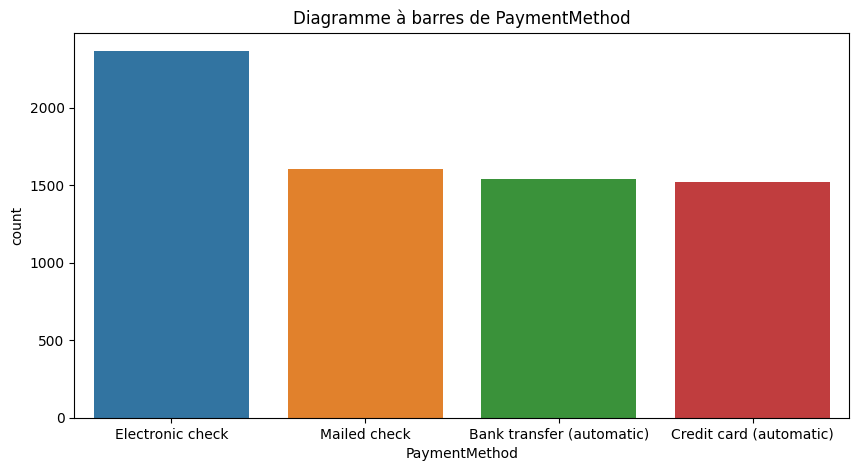

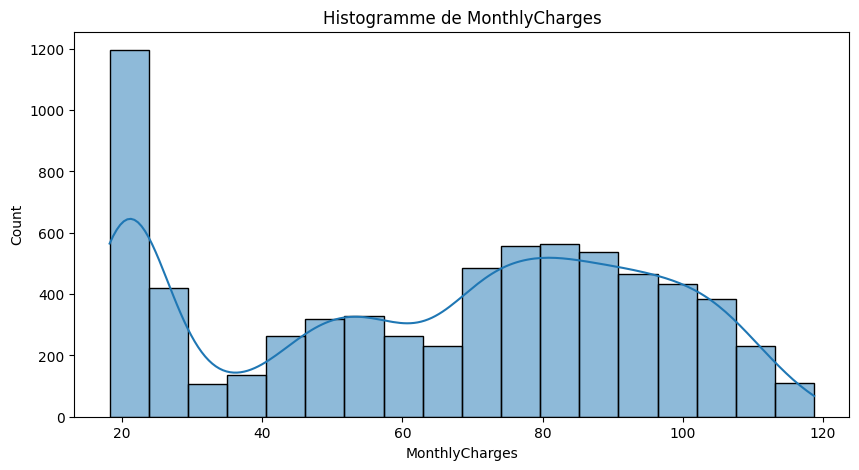

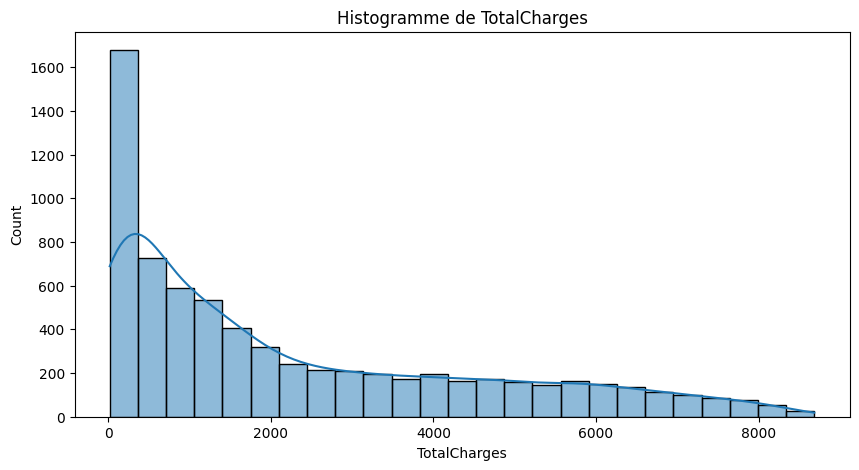

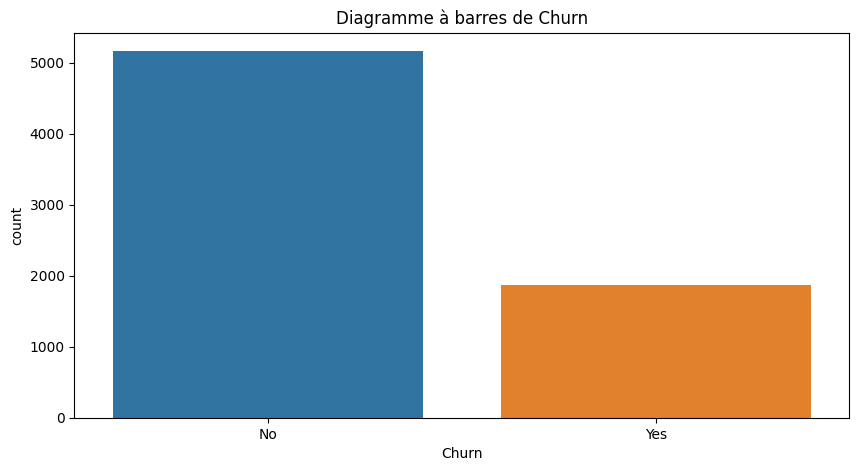

In [107]:
# Séparation des colonnes numériques et catégorielles
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Analyse univariée
for col in df.columns:
    plt.figure(figsize=(10, 5))
    if col in num_cols:
        # Histogramme pour les colonnes numériques
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Histogramme de {col}')
    elif col in cat_cols:
        # Diagramme à barres pour les colonnes catégorielles
        sns.countplot(data=df, x=col)
        plt.title(f'Diagramme à barres de {col}')
    plt.show()

In [108]:
# Statistiques descriptives pour les colonnes numériques
print("Statistiques descriptives pour les colonnes numériques:")
for col in num_cols:
    print(f"\n{col}:")
    print(df[col].describe())

# Analyse des distributions pour les colonnes catégorielles
print("\nAnalyse des distributions pour les colonnes catégorielles:")
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True))

Statistiques descriptives pour les colonnes numériques:

tenure:
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

MonthlyCharges:
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

TotalCharges:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Analyse des distributions pour les colonnes catégorielles:

gender:
Male      0.504693
Female    0.495307
Name: gender, dtype: float64

SeniorCitizen:
False    0.8376
True     0.1624
Name: SeniorCitizen, dtype: float64

Partner:
No     0.517491
Yes    0.482509
Name: Partner, dtype: float64

Depen

# IV. Analyse bivariée

## A. Visualisation de  la relation entre la variable cible et les variables catégorielles et numériques

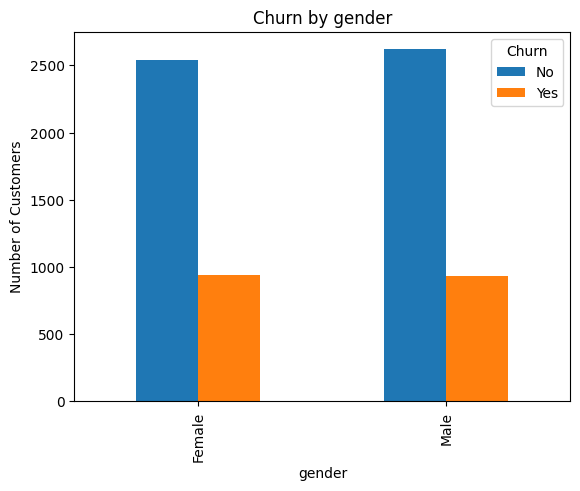

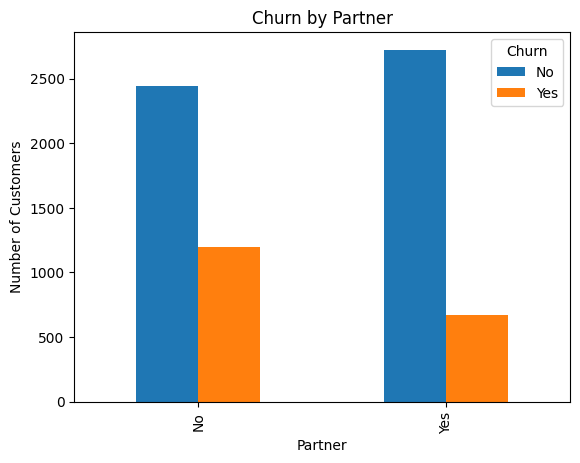

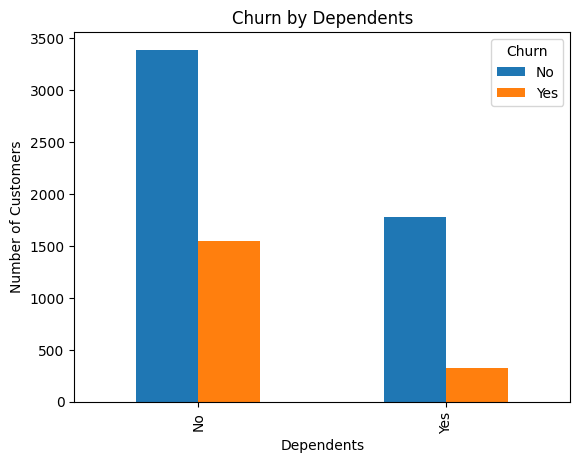

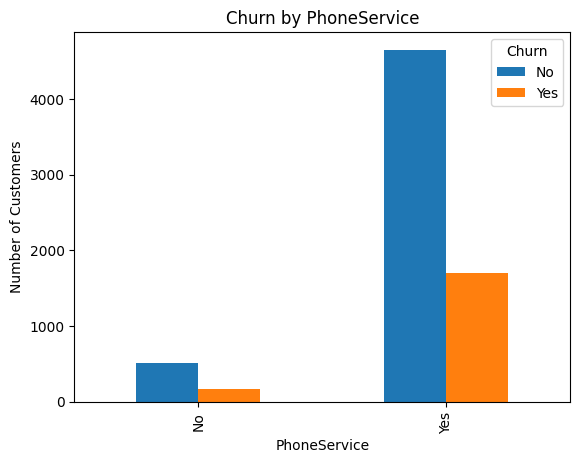

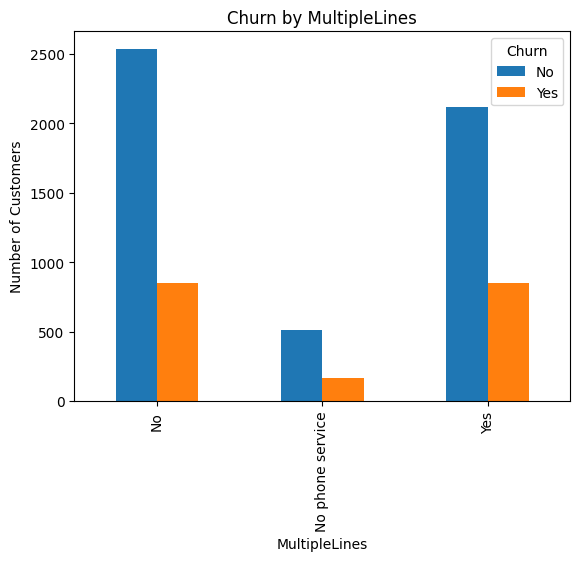

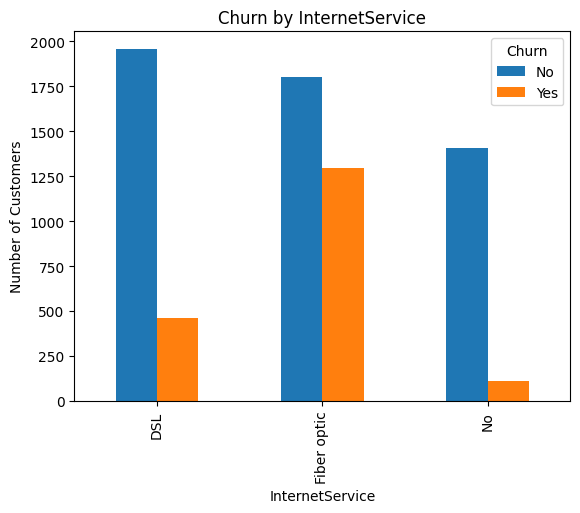

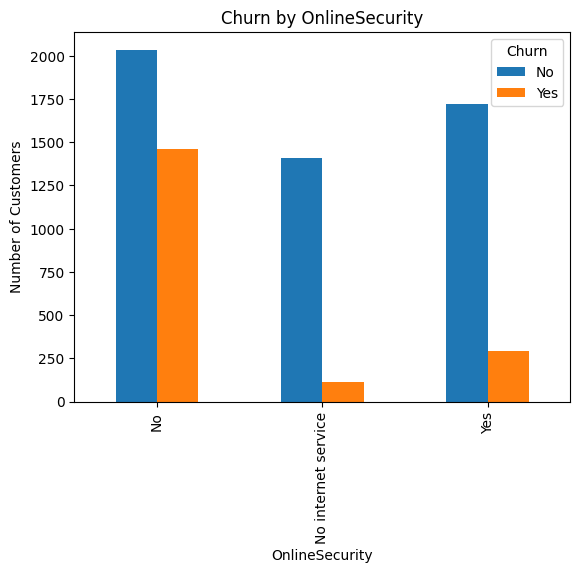

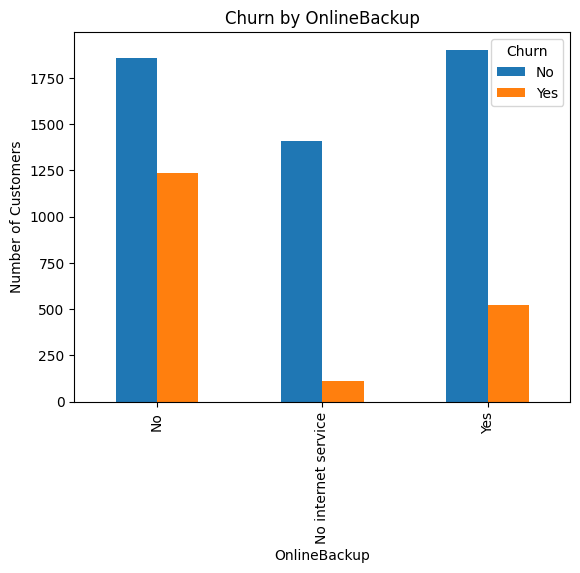

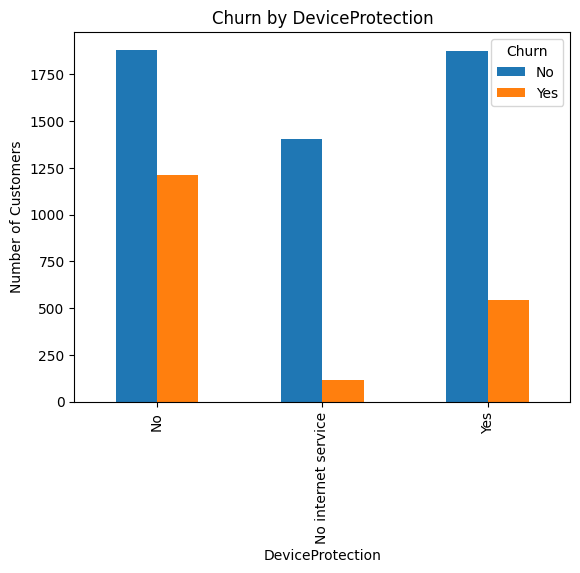

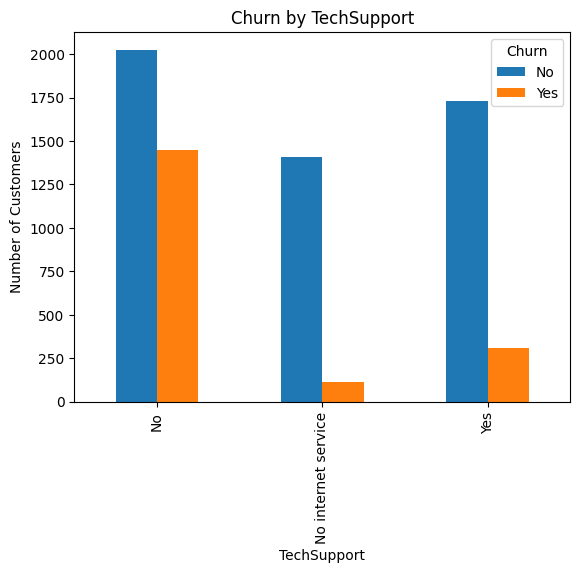

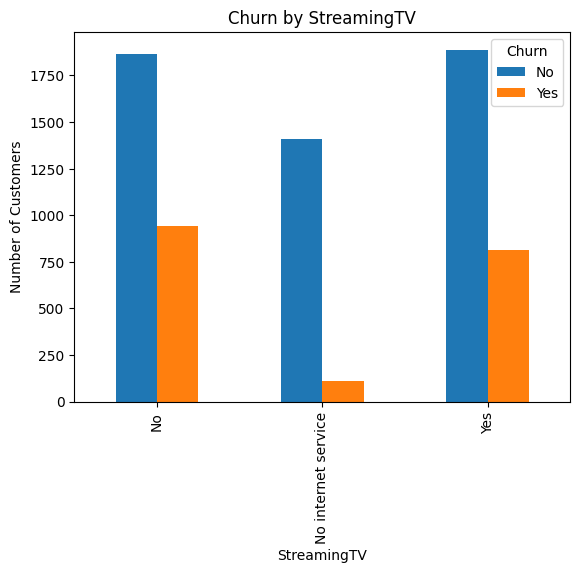

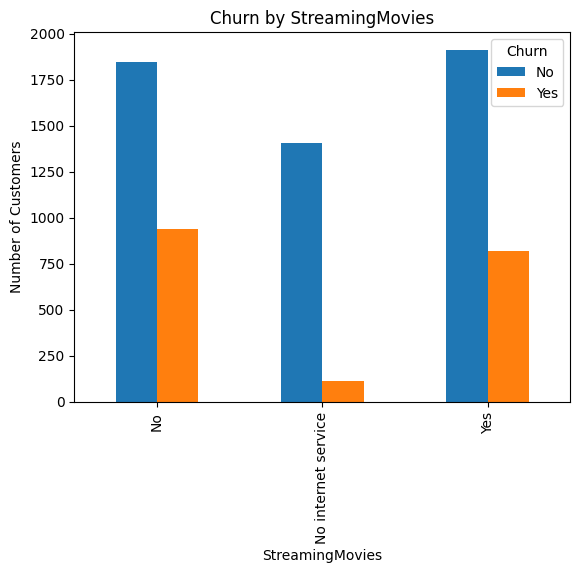

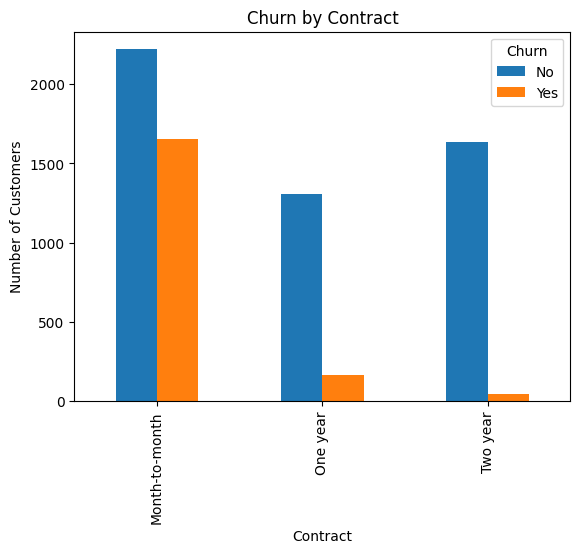

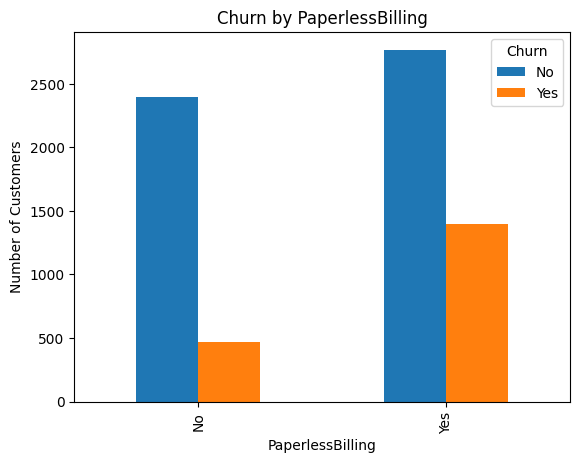

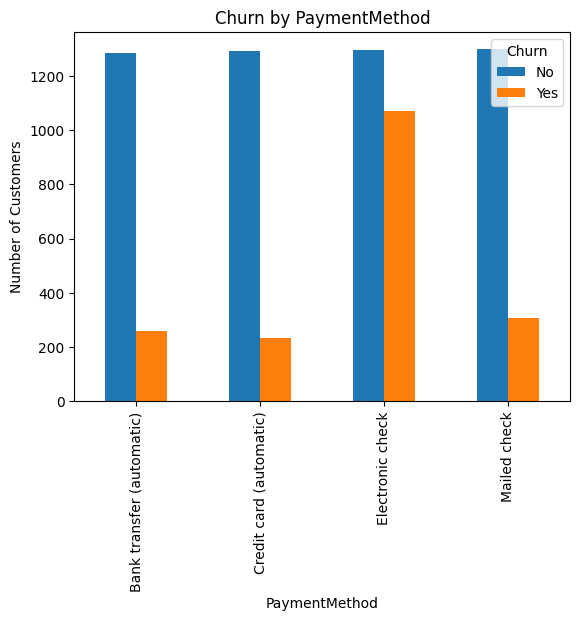

In [109]:
# Liste des variables catégorielles à analyser
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

# Boucle sur les variables catégorielles
for col in categorical_columns:
    # Group by the categorical variable and churn, then count the number of occurrences
    cat_churn = df.groupby([col, 'Churn'])['customerID'].count().reset_index()

    # Pivot the data to have the categorical variable as index and churn as columns
    cat_churn_pivot = cat_churn.pivot(index=col, columns='Churn', values='customerID')

    # Plot the pivot table as a stacked bar chart
    cat_churn_pivot.plot(kind='bar' )

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.title('Churn by ' + col)
    
    # Show the plot
    plt.show()

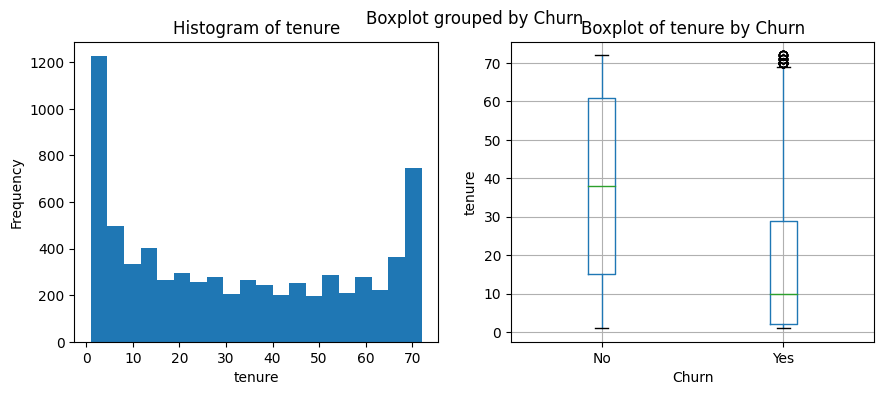

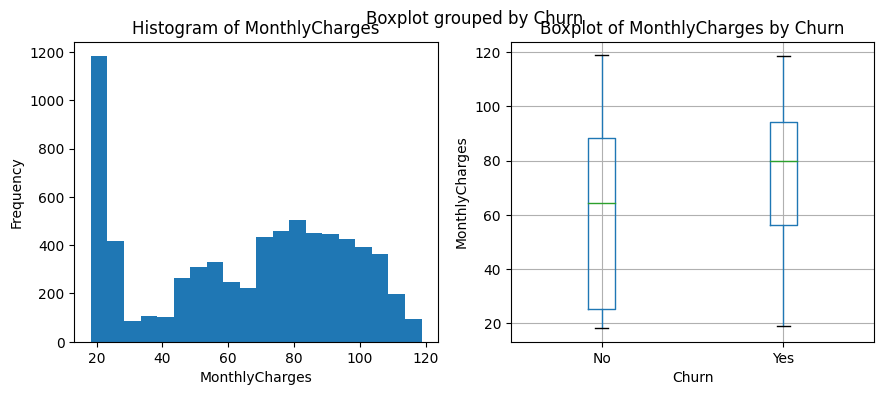

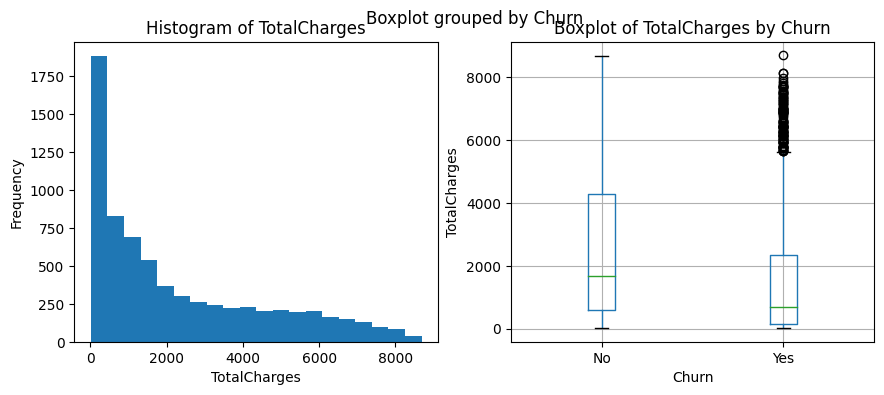

In [110]:
# Select the numeric columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Loop over each column
for col in num_cols:
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot an histogram in the first subplot
    ax1.hist(df[col], bins=20)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of {}'.format(col))
    
    # Plot a boxplot in the second subplot
    df.boxplot(column=[col], by='Churn', ax=ax2)
    ax2.set_xlabel('Churn')
    ax2.set_ylabel(col)
    ax2.set_title('Boxplot of {} by Churn'.format(col))
    
    # Show the figure
    plt.show()

In [111]:
# Statistiques descriptives pour la colonne tenure
print("Statistiques descriptives pour la colonne tenure:")
print(df['tenure'].describe())

# Statistiques descriptives pour la colonne MonthlyCharges
print("\nStatistiques descriptives pour la colonne MonthlyCharges:")
print(df['MonthlyCharges'].describe())

# Statistiques descriptives pour la colonne TotalCharges
print("\nStatistiques descriptives pour la colonne TotalCharges:")
print(df['TotalCharges'].describe())

Statistiques descriptives pour la colonne tenure:
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Statistiques descriptives pour la colonne MonthlyCharges:
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

Statistiques descriptives pour la colonne TotalCharges:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   bool   
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   bool   
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


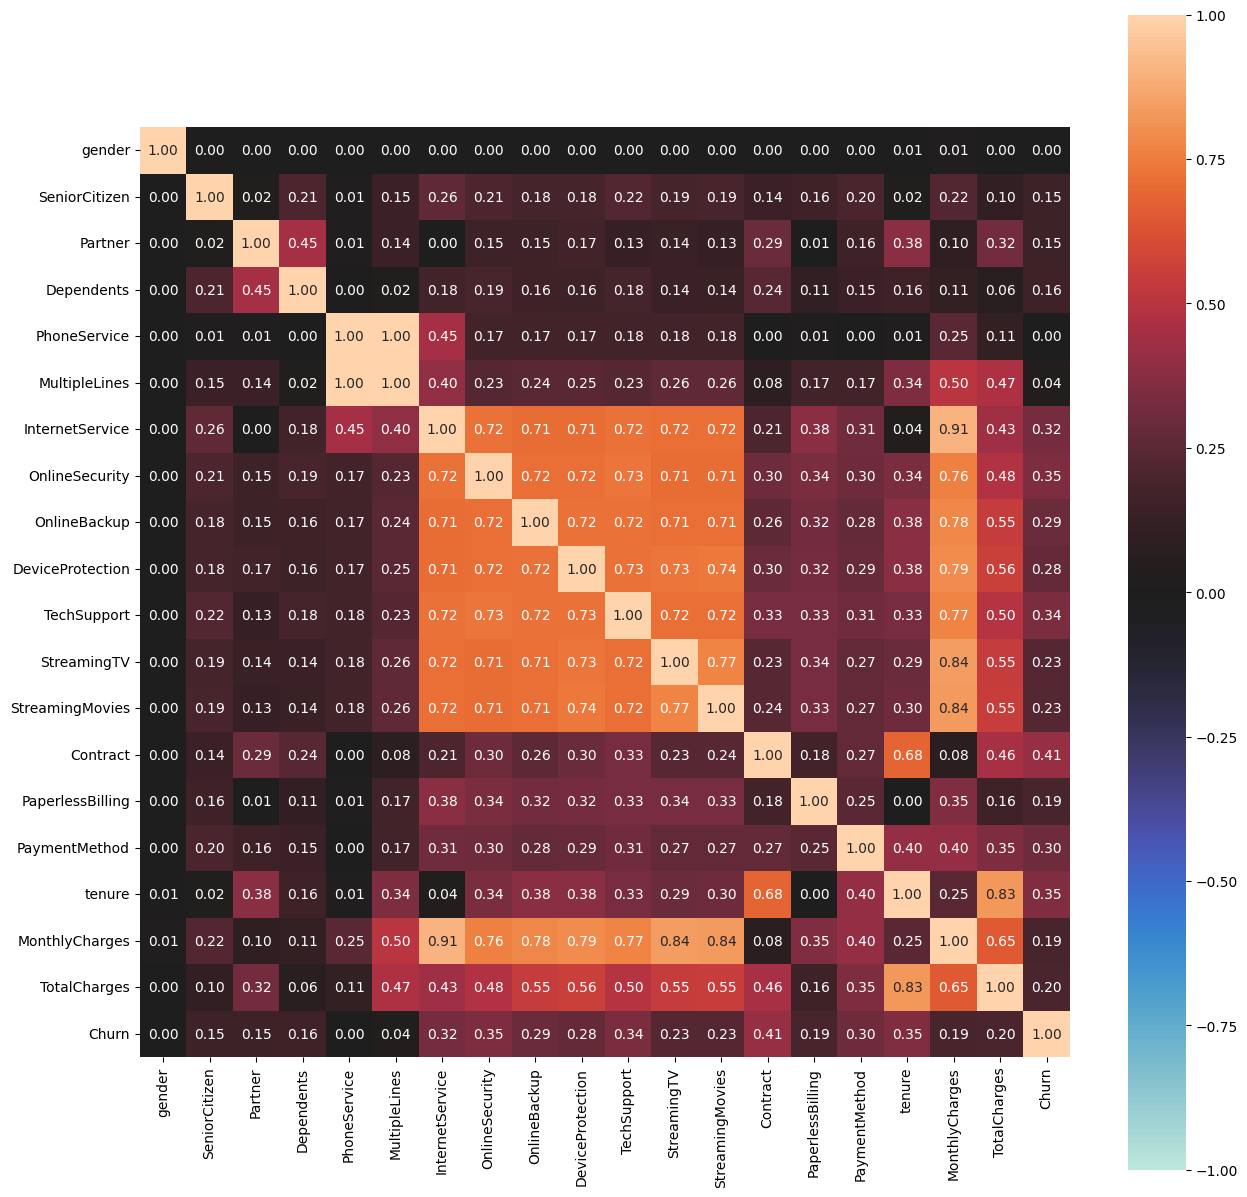

gender              0.000000
SeniorCitizen       0.150541
Partner             0.149194
Dependents          0.162351
PhoneService        0.000000
MultipleLines       0.036313
InternetService     0.321490
OnlineSecurity      0.346607
OnlineBackup        0.291435
DeviceProtection    0.280672
TechSupport         0.342115
StreamingTV         0.229541
StreamingMovies     0.230101
Contract            0.409242
PaperlessBilling    0.190768
PaymentMethod       0.302276
tenure              0.354049
MonthlyCharges      0.192858
TotalCharges        0.199484
Name: Churn, dtype: float64


In [116]:
import pandas as pd
from dython.nominal import associations

# Supposons que votre DataFrame est chargé dans la variable df
# cat_cols et num_cols sont définis comme précédemment

cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Concaténer toutes les colonnes, y compris 'Churn'
all_cols = cat_cols + num_cols + ['Churn']

# Calculer les corrélations de la colonne cible 'Churn' avec toutes les autres colonnes
associations_df = associations(df[all_cols], figsize=(15, 15))
churn_corr = associations_df['corr']['Churn'].drop('Churn')

# Afficher les corrélations
print(churn_corr)